In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=Warning)

# Return Forecasting: Time Series Analysis & Modelling with CAD-PHY Exchange rate data.


In [2]:
# Currency pair exchange rates for CAD/JPY
cad_jpy_df = pd.read_csv(
    Path("C:/Users/chefd/OneDrive/Desktop/csv/cad_jpy.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [3]:
# Trim the dataset to begin on January 1st, 1990
cad_jpy_df = cad_jpy_df.loc["1990-01-01":, :]
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


# Initial Time-Series Plotting

<AxesSubplot:xlabel='Date'>

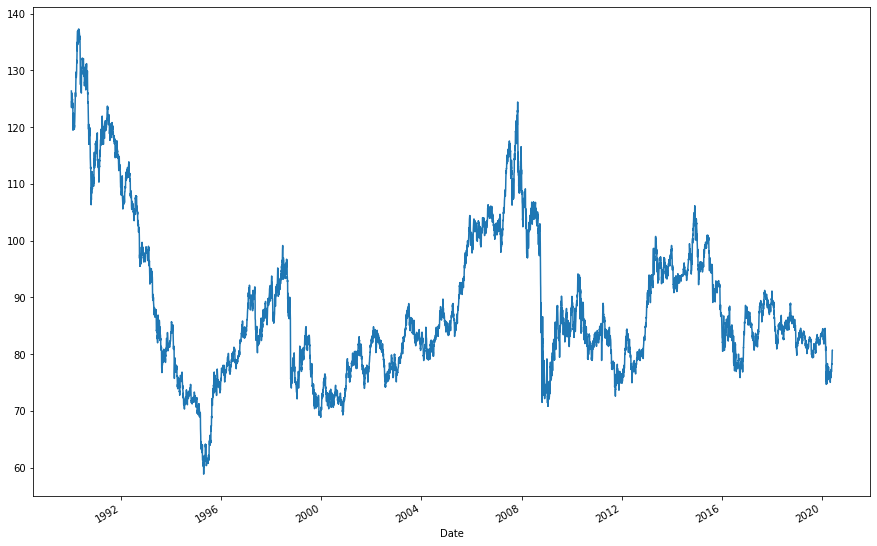

In [4]:
# Plot just the "Price" column from the dataframe:
cad_jpy_df.Price.plot(figsize=(15,10))

**Question:** Do you see any patterns, long-term and/or short? 

**Answer:** Long term I notice there is a constant average between 90 -80

---

# Decomposition Using a Hodrick-Prescott Filter

In [5]:
import statsmodels.api as sm

# Apply the Hodrick-Prescott Filter by decomposing the exchange rate price into two separate series:
Price_noise, Price_trend = sm.tsa.filters.hpfilter(cad_jpy_df["Price"])

<AxesSubplot:xlabel='Date'>

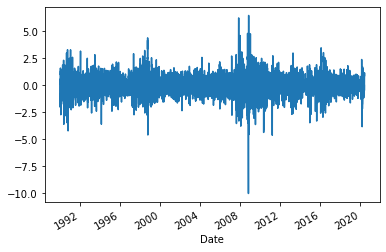

In [6]:
Price_noise.plot()

<AxesSubplot:xlabel='Date'>

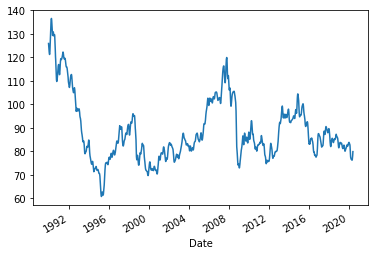

In [7]:
Price_trend.plot()

In [8]:
# Create a dataframe of just the exchange rate price, and add columns for "noise" and "trend" series from above:
cad_jpy_ent = pd.DataFrame()
cad_jpy_ent['Price'] = cad_jpy_df['Price']
cad_jpy_ent['Noise'] = Price_noise
cad_jpy_ent['Trend'] = Price_trend
cad_jpy_ent.head()

,Price,Noise,Trend
Date,,,
1990-01-02,126.37,0.519095,125.850905
1990-01-03,125.30,-0.379684,125.679684
1990-01-04,123.46,-2.048788,125.508788
1990-01-05,124.54,-0.798304,125.338304
1990-01-08,124.27,-0.897037,125.167037


In [9]:
# Plot the Exchange Rate Price vs. the Trend for 2015 to the present
cad_jpy_rpvt = cad_jpy_ent.loc['2015-01-01' :, :]
cad_jpy_rpvt = cad_jpy_rpvt.drop(columns=['Noise'])
cad_jpy_rpvt

,Price,Trend
Date,,
2015-01-01,103.12,101.596073
2015-01-02,102.25,101.304283
2015-01-05,101.70,100.991800
2015-01-06,100.04,100.660865
2015-01-07,100.93,100.314161
...,...,...
2020-05-29,78.29,78.793961
2020-06-01,79.27,79.051061
2020-06-02,80.40,79.311883


<bound method Artist.get_figure of <AxesSubplot:title={'center':'PRICE VS THE TREND'}, xlabel='Date'>>

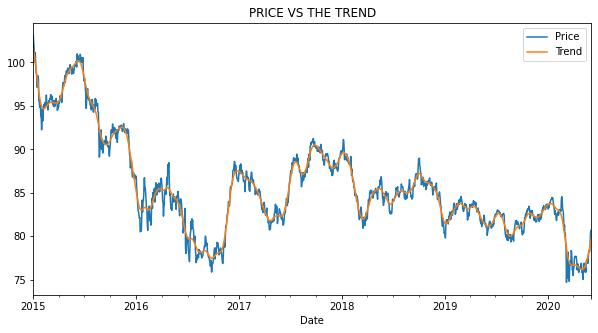

In [10]:
cad_jpy_rpvt.plot(figsize=(10,5),title='PRICE VS THE TREND').get_figure

**Question:** Do you see any patterns, long-term and/or short?

**Answer:**  the pattern I notice is that the yen seems to perform a bit better then the Canadian trend

<AxesSubplot:title={'center':'SETTLE NOISE'}, xlabel='Date'>

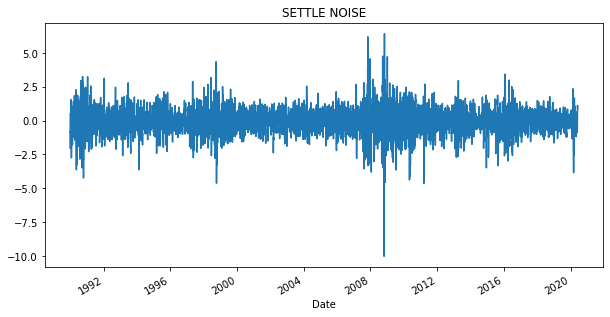

In [11]:
# Plot the Settle Noise
Price_noise.plot(figsize=(10,5),title='SETTLE NOISE')

---

# Can not do ARMA model as it has become obsolete

# Forecasting Returns using an ARMA Model

Using exchange rate *Returns*, estimate an ARMA model

1. ARMA: Create an ARMA model and fit it to the returns data. Note: Set the AR and MA ("p" and "q") parameters to p=2 and q=1: order=(2, 1).
2. Output the ARMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the forecasted returns (the results forecast from ARMA model)

In [12]:
# Create a series using "Price" percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
import numpy as np
returns = (cad_jpy_df[["Price"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Price
Date,
2020-05-29,0.076697
2020-06-01,1.251756
2020-06-02,1.425508
2020-06-03,0.373134
2020-06-04,0.012392


In [13]:
import statsmodels.api as sm

# Estimate and ARMA model using statsmodels (use order=(2, 1))
# YOUR CODE HERE!

# Fit the model and assign it to a variable called results
# YOUR CODE HERE!

In [14]:
# Output model summary results:
# YOUR CODE HERE!

In [15]:
# Plot the 5 Day Returns Forecast
# YOUR CODE HERE!

**Question:** Based on the p-value, is the model a good fit?

**Answer:** YOUR ANSWER HERE

---

# Forecasting the Exchange Rate Price using an ARIMA Model

In [27]:
from statsmodels.tsa.arima.model import ARIMA

# Estimate and ARIMA Model:
# Hint: ARIMA(df, order=(p, d, q))
model = ARIMA(cad_jpy_df['Price'], order=(5, 1, 1))

# Fit the model
results = model.fit()

C:\Users\chefd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\chefd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\chefd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [28]:
# Output model summary results:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 7929
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -8745.898
Date:                Thu, 04 Aug 2022   AIC                          17505.796
Time:                        23:36:28   BIC                          17554.643
Sample:                             0   HQIC                         17522.523
                               - 7929                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4303      0.331      1.299      0.194      -0.219       1.080
ar.L2          0.0178      0.012      1.459      0.145      -0.006       0.042
ar.L3         -0.0117      0.009     -1.313      0.189      -0.029       0.006
ar.L4          0.0110      0.008      1.299      0.194      -0.006       0.028
ar.L5         -0.0191      0.007     -2.706      0.007      -0.033      -0.005
ma.L1         -0.4583      0.332     -1.380      0.167      -1.109       0.192
sigma2         0.5318      0.004    118.418      0.000       0.523       0.541
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9233.72
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                            -0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\chefd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:title={'center':'Price Forecast'}>

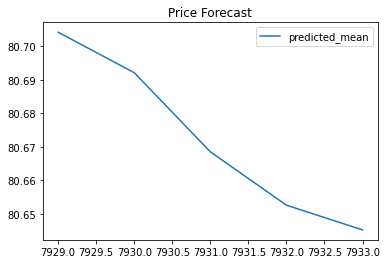

In [29]:
# Plot the 5 Day Price Forecast
pd.DataFrame(results.forecast(steps=5)).plot(title="Price Forecast")

**Question:** What does the model forecast will happen to the Japanese Yen in the near term?

**Answer:** There will a decline in the near term

---

# Volatility Forecasting with GARCH



In [20]:
from arch import arch_model

In [21]:
# Estimate a GARCH model:
model = arch_model(returns, mean="Zero", vol="GARCH", p=2, q=1)

# Fit the model
res = model.fit(disp="off")

In [22]:
# Summarize the model results
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8911.02
Distribution:                  Normal   AIC:                           17830.0
Method:            Maximum Likelihood   BIC:                           17858.0
                                        No. Observations:                 7928
Date:                Thu, Aug 04 2022   Df Residuals:                     7928
Time:                        23:24:52   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      9.0733e-03  2.545e-03      3.566  3.628e-04  [4.086e-03,1.406e-02]
alpha[1]       0.0624  1.835e-02      3.402  6.682e-04  [2.647e-02,9.841e-02]
alpha[2]       0.0000  2.010e-02      0.000      1.000 [-3.940e-02,3.940e-02]
beta[1]        0.9243  1.229e-02     75.205      0.000      [  0.900,  0.948]
=============================================================================

Covariance estimator: robust
"""

In [ ]:
# Find the last day of the dataset
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

In [23]:
# Create a 5 day forecast of volatility
forecast_horizon = 5

# Start the forecast using the last_day calculated above
forecasts = res.forecast(start='2020-06-04', horizon=forecast_horizon)
forecasts

In [24]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2020-06-04,12.566029,12.573718,12.581301,12.588778,12.596153


In [25]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Date,2020-06-04
h.1,12.566029
h.2,12.573718
h.3,12.581301
h.4,12.588778
h.5,12.596153


<AxesSubplot:>

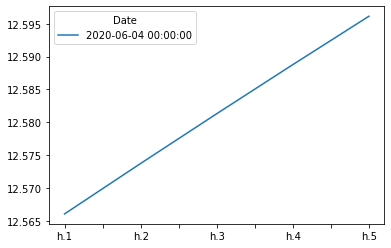

In [26]:
# Plot the forecast
final.plot()

**Question:** What does the model forecast will happen to volatility in the near term?

**Answer:** YOUR ANSWER HERE

---

# Conclusions

1. Based on your time series analysis, would you buy the yen now?

    -  based on the analysis I would not buy the yen now because of the heightend volatility

2. Is the risk of the yen expected to increase or decrease?
    * THE RISK WILL INCREASE

3. Based on the model evaluation, would you feel confident in using these models for trading?
    * YES I FIND THE GARCH MODEL ACCURATE AND FEEL CONFIDENT